# Importando Bibiliotecas para o projeto

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
from sklearn.preprocessing import MinMaxScaler
import random
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix
from sklearn.model_selection  import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import iqr
import csv
from sklearn.decomposition import PCA
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Abrindo o DataSet e Visualizando as 5 linhas iniciais

In [2]:
dataset = pd.read_csv("bank-additional-full.csv", delimiter=";")

display(dataset.head(n=10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Analise Exploratoria

## Obtendo quantidade de Registros

In [3]:
n_records = dataset.shape[0]
print("Numero de Registros: ", n_records)

Numero de Registros:  41188


## Obtendo informações das variaveis para verificar se alguma feature possui ausencia de valores

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

## Procurando e Visualizando Registros Duplicados

In [5]:
duplicados = dataset.duplicated()
for i in range (len(duplicados)):
    if duplicados[i] == True:
        print ("\nIndice do registro Duplicado: ", i)
        print (dataset.loc[i])
        


Indice do registro Duplicado:  1266
age                        39
job               blue-collar
marital               married
education            basic.6y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               thu
duration                  124
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.855
nr.employed              5191
y                          no
Name: 1266, dtype: object

Indice do registro Duplicado:  12261
age                        36
job                   retired
marital               married
education             unknown
default                    no
housing                    no
loan                       no
contact             telephone
month                     jul

## Listando a quantidade de registros duplicados

In [6]:
dataset.duplicated().sum()

12

## Eliminando registros duplicados

In [7]:
dataset = dataset.drop_duplicates()
print ("Nova quantidade de registros: ", dataset.shape[0])

Nova quantidade de registros:  41176


## Obtendo informações da média

In [8]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Contando a quantidade de features categoricas e numericas

In [9]:
categorical_features = dataset.select_dtypes(include = ["object"]).columns
numerical_features = dataset.select_dtypes(exclude = ["object"]).columns
print ('Qtde de Features Categoricas: ', len(categorical_features))
print ('Qtde de Features Numericas..: ', len(numerical_features))

Qtde de Features Categoricas:  11
Qtde de Features Numericas..:  10


## Comparando mediana e media para verificar se existe estão proximas

In [10]:
lista_feature = []
lista_mediana = []
lista_media = []
for col in numerical_features:
    print("Feature -> {} \nmediana: {} - média: {}".format(col, dataset[col].median(), dataset[col].mean()))
    lista_feature.append(col)
    lista_mediana.append(str(dataset[col].median()).replace(".", ","))
    lista_media.append(str(dataset[col].mean()).replace(".", ","))

Feature -> age 
mediana: 38.0 - média: 40.02380027200311
Feature -> duration 
mediana: 180.0 - média: 258.3158150378861
Feature -> campaign 
mediana: 2.0 - média: 2.567879347192539
Feature -> pdays 
mediana: 999.0 - média: 962.464809597824
Feature -> previous 
mediana: 0.0 - média: 0.17301340586749564
Feature -> emp.var.rate 
mediana: 1.1 - média: 0.08192150767503605
Feature -> cons.price.idx 
mediana: 93.749 - média: 93.57571988542011
Feature -> cons.conf.idx 
mediana: -41.8 - média: -40.502863318428055
Feature -> euribor3m 
mediana: 4.857 - média: 3.6212934476393523
Feature -> nr.employed 
mediana: 5191.0 - média: 5167.03486982399


## Ajustando as listas (feature, media e mediana) para gerar arquivo csv

In [11]:
arquivoOutput =  "mediana-e-media.csv"

listaParaGerarCsv = []

for ind in range(len(lista_feature)):
    listaInterna = []
    listaInterna.append(lista_feature[ind])
    listaInterna.append(lista_mediana[ind])
    listaInterna.append(lista_media[ind])

    listaParaGerarCsv.append(listaInterna)

## Gravando num arquivo csv

In [12]:
with open(arquivoOutput, 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['feature', 'mediana', 'media'])
    for linha in listaParaGerarCsv:
        spamwriter.writerow(linha)
        
print ('Arquivo gerado no diretorio atual: ', arquivoOutput)

Arquivo gerado no diretorio atual:  mediana-e-media.csv


## Visualizando o conteudo das variaveis categoricas

In [13]:
for col in categorical_features:
    print("Feature -> {}\n{}\n".format(col, dataset[col].value_counts()))

Feature -> job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Feature -> marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Feature -> education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

Feature -> default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64

Feature -> housing
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

Feature -> loan
no         33938
yes         6248
unknown      990
Name: loan, dty

## Como a feature default possui muitos registros sem informação ('unknown') e somente 3 registro com yes, excluimos essa variavel

In [14]:
dataset = dataset.drop(["default"], axis = 1)

## A variavel duração deve ser excluida, pois, somente é obtida após o contato da campanha

In [15]:
dataset = dataset.drop(["duration"], axis = 1)

## Função para exibir o grafico de cada variável

In [16]:
def gera_grafico_bar_total_qtde(locations, heights, title, ylabel, columns, rows, anotacoes, xy_anot, xytext_anot, namefigura):
    
    plt.bar(x=locations, height=heights, width=-0.8,align='edge')
    plt.title(titulo)
    plt.ylabel(yrotulo)

    cell_text = [[]]
    for x in heights:
        cell_text[0].append(x)
    cell_text

    the_table = plt.table(cellText=cell_text,
                          rowLabels=rows,
                          rowColours='w',
                          colLabels=columns,
                          colLoc='center',
                          rowLoc='left',
                          loc='bottom')
    the_table.auto_set_font_size(value=True)
    
    plt.annotate(anotacoes, 
            xy=xy_anot,
            xycoords='data',
            xytext=xytext_anot,
            textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
    
    plt.subplots_adjust(left = 0.2, bottom=0.2, wspace = 2.0)
    plt.xticks([])
    plt.savefig(namefigura)  
    return



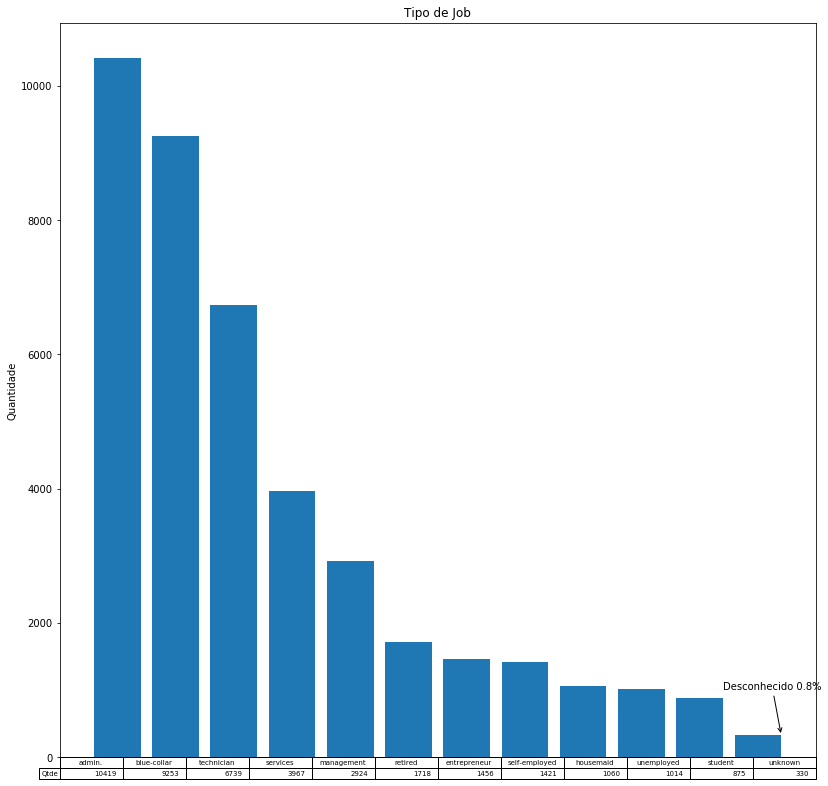

In [17]:
heights = dataset['job'].value_counts()

locations = list(range(1, len(heights)+1))  
    
titulo = 'Tipo de Job'
yrotulo = 'Quantidade'
colunas = heights.index
linhas = ['Qtde']

total = 0
for qtde in heights:
    total += qtde
percentual_desconhecido = round(100 * (heights['unknown']/total),2)    
anotacoes = "Desconhecido " + str(percentual_desconhecido) + "%"
xy_anot=(12, 330)
xytext_anot=(11, 1000)

figure(num=None, figsize=(15, 15))
namefigura = 'Grafico-Job.jpg'

gera_grafico_bar_total_qtde(locations, heights, titulo, yrotulo, colunas, linhas, anotacoes, xy_anot, xytext_anot, namefigura) 

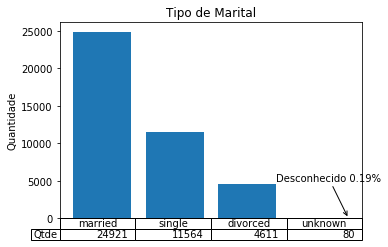

In [18]:
heights = dataset['marital'].value_counts() 
locations = list(range(1, len(heights)+1)) 
titulo = 'Tipo de Marital'
yrotulo = 'Quantidade'
colunas = heights.index
linhas = ['Qtde']

total = 0
for qtde in heights:
    total += qtde
percentual_desconhecido = round(100 * (heights['unknown']/total),2)    
anotacoes = "Desconhecido " + str(percentual_desconhecido) + "%"
xy_anot=(4, 4)
xytext_anot=(3, 5000)
    
namefigura = 'Grafico-Marital.jpg'

gera_grafico_bar_total_qtde(locations, heights, titulo, yrotulo, colunas, linhas, anotacoes, xy_anot, xytext_anot, namefigura) 

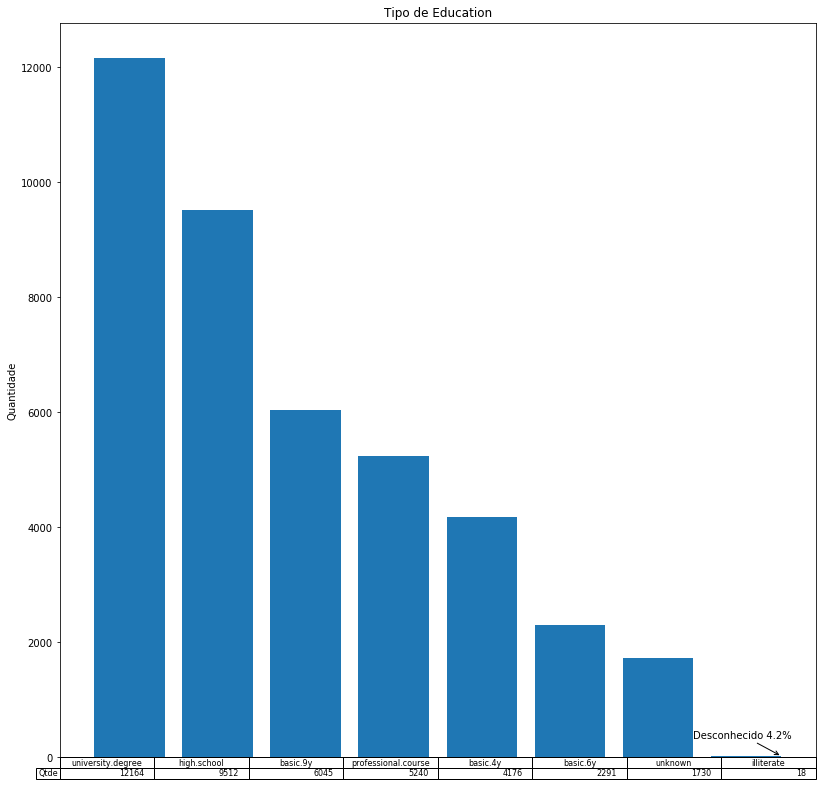

In [19]:
# Chamando Função
heights = dataset['education'].value_counts() 
locations = list(range(1, len(heights)+1)) 
titulo = 'Tipo de Education'
yrotulo = 'Quantidade'
colunas = heights.index
linhas = ['Qtde']

total = 0
for qtde in heights:
    total += qtde
percentual_desconhecido = round(100 * (heights['unknown']/total),2)    
anotacoes = "Desconhecido " + str(percentual_desconhecido) + "%"
xy_anot=(8, 18)
xytext_anot=(7, 330)
    
figure(num=None, figsize=(15, 15))    

namefigura = 'Grafico-Education.jpg'

gera_grafico_bar_total_qtde(locations, heights, titulo, yrotulo, colunas, linhas, anotacoes, xy_anot, xytext_anot, namefigura) 

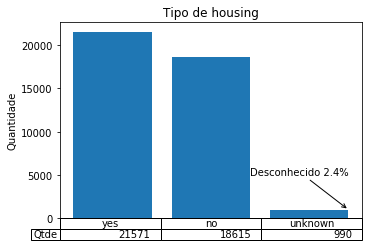

In [20]:
# Chamando Função
heights = dataset['housing'].value_counts() 
locations = list(range(1, len(heights)+1)) 
titulo = 'Tipo de housing'
yrotulo = 'Quantidade'
colunas = heights.index
linhas = ['Qtde']

total = 0
for qtde in heights:
    total += qtde
percentual_desconhecido = round(100 * (heights['unknown']/total),2)    
anotacoes = "Desconhecido " + str(percentual_desconhecido) + "%"
xy_anot=(3, 990)
xytext_anot=(2, 5000)
    
namefigura = 'Grafico-Housing.jpg'

gera_grafico_bar_total_qtde(locations, heights, titulo, yrotulo, colunas, linhas, anotacoes, xy_anot, xytext_anot, namefigura) 

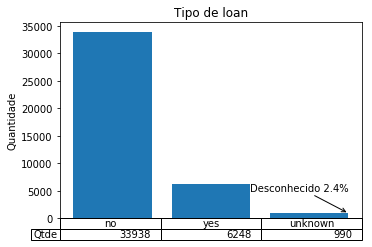

In [21]:
# Chamando Função
heights = dataset['loan'].value_counts() 
locations = list(range(1, len(heights)+1)) 
titulo = 'Tipo de loan'
yrotulo = 'Quantidade'
colunas = heights.index
linhas = ['Qtde']

total = 0
for qtde in heights:
    total += qtde
percentual_desconhecido = round(100 * (heights['unknown']/total),2)    
anotacoes = "Desconhecido " + str(percentual_desconhecido) + "%"
xy_anot=(3, 900)
xytext_anot=(2, 5000)
    
namefigura = 'Grafico-Loan.jpg'

gera_grafico_bar_total_qtde(locations, heights, titulo, yrotulo, colunas, linhas, anotacoes, xy_anot, xytext_anot, namefigura) 

## Para as variaveis categoricas que possuem registros sem informação, foi colocado o dado mais informado

In [22]:
dataset.loc[dataset["job"] == "unknown", "job"] = "admin."
dataset.loc[dataset["marital"] == "unknown", "marital"] = "married"

## Analisando as idades (Age) por tipo de educação (education)

In [23]:
df_age_education = pd.DataFrame(columns=['age', 'education'])

df_age_education['age'] = dataset['age'].copy()  
df_age_education['education'] = dataset['education'].copy()  


In [24]:
df_education_conhecido = df_age_education.query('education == "university.degree"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['education', 'age'])['education'].count()
df_education_conhecido_agrup   

education          age
university.degree  20       2
                   21       8
                   22      13
                   23      34
                   24      80
                   25     157
                   26     184
                   27     268
                   28     290
                   29     572
                   30     683
                   31     721
                   32     768
                   33     668
                   34     653
                   35     585
                   36     567
                   37     482
                   38     387
                   39     373
                   40     302
                   41     321
                   42     347
                   43     254
                   44     213
                   45     255
                   46     245
                   47     228
                   48     240
                   49     191
                         ... 
                   53     207
                 

In [25]:
df_education_conhecido = df_age_education.query('education == "high.school"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['education', 'age'])['education'].count()
df_education_conhecido_agrup 

education    age
high.school  18       5
             19       4
             20      33
             21      52
             22      54
             23      89
             24     193
             25     219
             26     250
             27     250
             28     302
             29     406
             30     427
             31     522
             32     410
             33     455
             34     356
             35     398
             36     445
             37     371
             38     310
             39     350
             40     276
             41     270
             42     222
             43     250
             44     237
             45     202
             46     208
             47     197
                   ... 
             54     124
             55     122
             56     116
             57     109
             58      85
             59      56
             60      54
             61      13
             62      11
             63       7

In [26]:
df_education_conhecido = df_age_education.query('education == "basic.9y"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['education', 'age'])['education'].count()
df_education_conhecido_agrup 

education  age
basic.9y   17       3
           18       4
           19      14
           20       6
           21      24
           22      31
           23      50
           24      82
           25     104
           26     127
           27     145
           28     196
           29     191
           30     219
           31     280
           32     217
           33     273
           34     247
           35     252
           36     300
           37     192
           38     217
           39     222
           40     196
           41     222
           42     145
           43     158
           44     143
           45     213
           46     197
                 ... 
           53     103
           54      84
           55      85
           56      88
           57      85
           58      56
           59      48
           60      14
           61       6
           62       1
           63       1
           64       2
           65       1
           66    

In [27]:
df_education_conhecido = df_age_education.query('education == "professional.course"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['education', 'age'])['education'].count()
df_education_conhecido_agrup 

education            age
professional.course  20       2
                     21       4
                     22      15
                     23      36
                     24      58
                     25      47
                     26      70
                     27      93
                     28      84
                     29     171
                     30     220
                     31     223
                     32     257
                     33     253
                     34     267
                     35     279
                     36     195
                     37     239
                     38     207
                     39     199
                     40     166
                     41     155
                     42     122
                     43     133
                     44     161
                     45     126
                     46     126
                     47     116
                     48     131
                     49      96
               

In [28]:
df_education_conhecido = df_age_education.query('education == "basic.4y"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['education', 'age'])['education'].count()
df_education_conhecido_agrup 

education  age
basic.4y   18       4
           19       3
           20       7
           21       2
           22       6
           23       9
           24      14
           25      27
           26      27
           27      34
           28      41
           29      39
           30      54
           31      76
           32      92
           33      76
           34      88
           35     100
           36      93
           37      67
           38      93
           39     119
           40      88
           41     135
           42     144
           43     148
           44     118
           45     143
           46     136
           47     136
                 ... 
           61      14
           62       6
           63      15
           64      13
           65      17
           66      24
           67      10
           68      10
           69       6
           70      27
           71      22
           72      13
           73      19
           74    

In [29]:
df_education_conhecido = df_age_education.query('education == "basic.6y"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['education', 'age'])['education'].count()
df_education_conhecido_agrup 

education  age
basic.6y   18       2
           19       4
           22       9
           23       3
           24       9
           25      14
           26      25
           27      33
           28      51
           29      46
           30      59
           31      85
           32      79
           33      81
           34      88
           35      96
           36     123
           37      92
           38     133
           39     119
           40      93
           41     102
           42     102
           43      76
           44      94
           45      72
           46      74
           47      62
           48      72
           49      51
           50      48
           51      47
           52      39
           53      33
           54      21
           55      20
           56      31
           57      28
           58      19
           59      23
           60      11
           61       1
           63       1
           64       1
           65    

In [30]:
df_education_conhecido = df_age_education.query('education == "illiterate"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['education', 'age'])['education'].count()
df_education_conhecido_agrup 

education   age
illiterate  34     3
            42     2
            44     1
            45     3
            51     4
            54     1
            55     2
            60     1
            80     1
Name: education, dtype: int64

## Criando as Faixas

In [31]:
df_age_education['faixa'] = df_age_education['education']
df_age_education.loc[df_age_education["age"] < 20, "faixa"] = "faixa de 10 a 19"
df_age_education.loc[(df_age_education["age"] >= 20) & (df_age_education["age"] < 30), "faixa"] = "faixa de 20 a 29"
df_age_education.loc[(df_age_education["age"] >= 30) & (df_age_education["age"] < 40), "faixa"] = "faixa de 30 a 39"
df_age_education.loc[(df_age_education["age"] >= 40) & (df_age_education["age"] < 50), "faixa"] = "faixa de 40 a 49"
df_age_education.loc[(df_age_education["age"] >= 50) & (df_age_education["age"] < 60), "faixa"] = "faixa de 50 a 59"
df_age_education.loc[(df_age_education["age"] >= 60) & (df_age_education["age"] < 70), "faixa"] = "faixa de 60 a 69"
df_age_education.loc[(df_age_education["age"] >= 70) & (df_age_education["age"] < 80), "faixa"] = "faixa de 70 a 79"
df_age_education.loc[(df_age_education["age"] >= 80) & (df_age_education["age"] < 90), "faixa"] = "faixa de 80 a 89"
df_age_education.loc[(df_age_education["age"] >= 90) & (df_age_education["age"] < 100), "faixa"] = "faixa de 90 a 99"
df_age_education.loc[df_age_education["age"] >= 100, "faixa"] = "faixa de 100 para cima"

## Obtendo os valores mais repetidos por faixa de idade

In [32]:
df_education_conhecido = df_age_education.query('education != "unknown"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['faixa', 'education'])['faixa'].count()

## Função para exibir os valores por faixa de idade

In [33]:
def exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa):
    
    df_education_conhecido_faixa = df_education_conhecido_agrup.loc[nome_faixa]
    df_education_conhecido_faixa = df_education_conhecido_faixa.sort_values(ascending=False)
    print(df_education_conhecido_faixa)
    maior_faixa = nome_faixa + ' - ' + df_education_conhecido_faixa.index[0] + " - " + str(df_education_conhecido_faixa[0])
    maior_education = df_education_conhecido_faixa.index[0]
    
    return maior_faixa, maior_education



## Chamando a função para obter os valores por faixa de idade

In [34]:
maior_faixa = []
maior_education = []
nome_faixa = 'faixa de 10 a 19'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
basic.9y       21
high.school     9
basic.4y        7
basic.6y        6
Name: faixa, dtype: int64


In [35]:
nome_faixa = 'faixa de 20 a 29'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
high.school            1848
university.degree      1608
basic.9y                956
professional.course     580
basic.4y                206
basic.6y                190
Name: faixa, dtype: int64


In [36]:
nome_faixa = 'faixa de 30 a 39'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
university.degree      5887
high.school            4044
basic.9y               2419
professional.course    2339
basic.6y                955
basic.4y                858
illiterate                3
Name: faixa, dtype: int64


In [37]:
nome_faixa = 'faixa de 40 a 49'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
university.degree      2596
high.school            2288
basic.9y               1654
professional.course    1332
basic.4y               1326
basic.6y                798
illiterate                6
Name: faixa, dtype: int64


In [38]:
nome_faixa = 'faixa de 50 a 59'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
university.degree      1823
basic.4y               1360
high.school            1165
basic.9y                939
professional.course     841
basic.6y                309
illiterate                7
Name: faixa, dtype: int64


In [39]:
nome_faixa = 'faixa de 60 a 69'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
university.degree      188
basic.4y               178
high.school            124
professional.course    106
basic.9y                29
basic.6y                20
illiterate               1
Name: faixa, dtype: int64


In [40]:
nome_faixa = 'faixa de 70 a 79'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
basic.4y               144
university.degree       51
professional.course     33
high.school             24
basic.9y                21
basic.6y                11
Name: faixa, dtype: int64


In [41]:
nome_faixa = 'faixa de 80 a 89'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
basic.4y               95
high.school            10
university.degree       9
professional.course     9
basic.9y                5
illiterate              1
basic.6y                1
Name: faixa, dtype: int64


In [42]:
nome_faixa = 'faixa de 90 a 99'

maior_faixa_retorno, maior_education_retorno = exibe_qtde_faixa_e_retorna_maior_faixa(df_education_conhecido_agrup, nome_faixa)
maior_faixa.append(maior_faixa_retorno)
maior_education.append(maior_education_retorno)

education
university.degree    2
basic.4y             2
basic.9y             1
basic.6y             1
Name: faixa, dtype: int64


## Exibindo as quantidade de registros sem informação 'unknown' por faixa de idade 

In [43]:
df_education_conhecido = df_age_education.query('education == "unknown"')
df_education_conhecido_agrup = df_education_conhecido.groupby(by=['faixa', 'education'])['faixa'].count()
df_education_conhecido_agrup

faixa             education
faixa de 10 a 19  unknown       32
faixa de 20 a 29  unknown      204
faixa de 30 a 39  unknown      428
faixa de 40 a 49  unknown      523
faixa de 50 a 59  unknown      417
faixa de 60 a 69  unknown       78
faixa de 70 a 79  unknown       34
faixa de 80 a 89  unknown       10
faixa de 90 a 99  unknown        4
Name: faixa, dtype: int64

## Atribuindo valores por faixa para os registros desconhecidos 'unknown'

In [44]:
dataset.loc[(dataset["age"] < 20) & (dataset["education"] == "unknown"), "education"] = maior_education[0]
dataset.loc[(dataset["age"] >= 20) & (dataset["age"] < 30) & 
                     (dataset["education"] == "unknown"), "education"] =  maior_education[1]
dataset.loc[(dataset["age"] >= 30) & (dataset["age"] < 40) &
                     (dataset["education"] == "unknown"), "education"] =  maior_education[2]
dataset.loc[(dataset["age"] >= 40) & (dataset["age"] < 50) &
                     (dataset["education"] == "unknown"), "education"] =  maior_education[3]
dataset.loc[(dataset["age"] >= 50) & (dataset["age"] < 60) &
                     (dataset["education"] == "unknown"), "education"] =  maior_education[4]
dataset.loc[(dataset["age"] >= 60) & (dataset["age"] < 70) &
                     (dataset["education"] == "unknown"), "education"] =  maior_education[5]
dataset.loc[(dataset["age"] >= 70) & (dataset["age"] < 80) &
                     (dataset["education"] == "unknown"), "education"] =  maior_education[6]
dataset.loc[(dataset["age"] >= 80) & (dataset["age"] < 90) &
                     (dataset["education"] == "unknown"), "education"] =  maior_education[7]
dataset.loc[(dataset["age"] >= 90) & (dataset["age"] < 100) &
                     (dataset["education"] == "unknown"), "education"] =  maior_education[8]

## Query para verificar que não existe nenhum registro da feature education com valor desconhecido 'unkwnown'

In [45]:
dataset.query('education == "unknown"')

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


## Como a variavel housing não possui um dado mais informado, foi colocado aleatoriamente o valor

In [46]:
dataset.loc[dataset["housing"] == "unknown", "housing"] = random.choice(["yes", "no"])

## Identificando Outliers

## Obtendo somente as colunas numéricas

In [47]:
numerical_features = dataset.select_dtypes(exclude = ["object"]).columns
df_numerical = pd.DataFrame(columns=numerical_features)
for col in numerical_features:
    df_numerical[col] = dataset[col]

# Utilizando Método Turco para identidicar os valores discrepantes

In [48]:
Q1 = []
Q3 = []
ind = 0
lista_feature = []
lista_iqr_x = []
lista_Q1 = []
lista_Q1_step = []
lista_Q3 = []
lista_Q3_step = []

for feature in df_numerical.keys():
    Q1.append(np.percentile(df_numerical[feature], 25))
    Q3.append(np.percentile(df_numerical[feature], 75))   
    step = iqr(df_numerical[feature]) * 1.5
    print(feature, " - step = ", step, " -> Percentil Q1 = ", Q1[ind], " | Q1-step = ", Q1[ind]-step, 
          " | Q3 = ", Q3[ind], " | Q3+step = ", Q3[ind]+step)
    lista_feature.append(feature)
    lista_iqr_x.append(step)
    lista_Q1.append(Q1[ind])
    lista_Q1_step.append(Q1[ind]-step)
    lista_Q3.append(Q3[ind])
    lista_Q3_step.append(Q3[ind]+step)
    ind += 1


age  - step =  22.5  -> Percentil Q1 =  32.0  | Q1-step =  9.5  | Q3 =  47.0  | Q3+step =  69.5
campaign  - step =  3.0  -> Percentil Q1 =  1.0  | Q1-step =  -2.0  | Q3 =  3.0  | Q3+step =  6.0
pdays  - step =  0.0  -> Percentil Q1 =  999.0  | Q1-step =  999.0  | Q3 =  999.0  | Q3+step =  999.0
previous  - step =  0.0  -> Percentil Q1 =  0.0  | Q1-step =  0.0  | Q3 =  0.0  | Q3+step =  0.0
emp.var.rate  - step =  4.800000000000001  -> Percentil Q1 =  -1.8  | Q1-step =  -6.6000000000000005  | Q3 =  1.4  | Q3+step =  6.200000000000001
cons.price.idx  - step =  1.3784999999999954  -> Percentil Q1 =  93.075  | Q1-step =  91.69650000000001  | Q3 =  93.994  | Q3+step =  95.3725
cons.conf.idx  - step =  9.450000000000006  -> Percentil Q1 =  -42.7  | Q1-step =  -52.150000000000006  | Q3 =  -36.4  | Q3+step =  -26.949999999999992
euribor3m  - step =  5.4254999999999995  -> Percentil Q1 =  1.344  | Q1-step =  -4.081499999999999  | Q3 =  4.961  | Q3+step =  10.3865
nr.employed  - step =  193.5  -

## Armazenando os valores dos parametros do calculo em um csv

In [49]:
arquivoOutput =  "Q1-Q3-outliers.csv"

listaParaGerarCsv = []

for ind in range(len(lista_feature)):
    listaInterna = []
    listaInterna.append(lista_feature[ind])
    listaInterna.append(str(lista_iqr_x[ind]).replace(".", ","))
    listaInterna.append(str(lista_Q1[ind]).replace(".", ","))
    listaInterna.append(str(lista_Q1_step[ind]).replace(".", ","))
    listaInterna.append(str(lista_Q3[ind]).replace(".", ","))
    listaInterna.append(str(lista_Q3_step[ind]).replace(".", ","))
    
    listaParaGerarCsv.append(listaInterna)

## Gravando arquivo cvs

In [50]:
with open(arquivoOutput, 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['feature', 'iqr * 1.5', 'Q1', 'Q1-step', 'Q3', 'Q3+step'])
    for linha in listaParaGerarCsv:
        spamwriter.writerow(linha)
        
print ('Arquivo gerado no diretorio atual: ', arquivoOutput)

Arquivo gerado no diretorio atual:  Q1-Q3-outliers.csv


## Identificando os Outliers

In [51]:
for feature in df_numerical.keys():
    
    Q1 = np.percentile(df_numerical[feature], 25)
    Q3 = np.percentile(df_numerical[feature], 75)

    step = iqr(df_numerical[feature]) * 1.5

    print ("\nRegistros considerados outliers '{}':".format(feature))
    print (df_numerical[~((df_numerical[feature] >= Q1 - step) & (df_numerical[feature] <= Q3 + step))])
    


Registros considerados outliers 'age':
       age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
27713   70         3    999         0          -1.8          92.843   
27757   76         9    999         0          -1.8          92.843   
27780   73         1    999         1          -1.8          92.843   
27800   88         1    999         0          -1.8          92.843   
27802   88         2    999         0          -1.8          92.843   
27805   88         5    999         0          -1.8          92.843   
27808   88         6    999         0          -1.8          92.843   
27810   88         1    999         0          -1.8          92.843   
27811   88         1    999         0          -1.8          92.843   
27812   88         1    999         0          -1.8          92.843   
27813   88         7    999         0          -1.8          92.843   
27814   88         3    999         0          -1.8          92.843   
27815   88         2    999         0

       age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
24013   38         1    999         1          -0.1          93.798   
24019   40         1    999         1          -0.1          93.798   
24076   36         1    999         1          -0.1          93.200   
24102   36         1    999         1          -0.1          93.200   
24108   37         1      6         1          -0.1          93.200   
24113   29         1    999         1          -0.1          93.200   
24124   42         1    999         1          -0.1          93.200   
24135   34         1    999         1          -0.1          93.200   
24139   44         1    999         1          -0.1          93.200   
24140   51         1    999         1          -0.1          93.200   
24143   52         1    999         1          -0.1          93.200   
24146   41         1    999         1          -0.1          93.200   
24157   44         1    999         1          -0.1          93.200   
24161 

In [52]:
#### age      -> valores < 32 ou > 69,5 são considerados outliers ( 468 linhas), não faz sentido, pois, são valores 'normais' para
####             idade das pessoas
#### campaign -> valores < -2 ou > 6    são considerados outliers (2406 linhas), não faz sentido, pois, 7 ou mais campanhas
####             podem ser possíveis
#### pdays    -> valores < 999 ou > 999 são considerados outliers (1515 linhas), não faz sentido, pois, clientes que não foram 
####             contatados assumem o valor 999, os demais assumem a quantidade de contatos
#### previous -> valores < 0 ou > 0    são considerados outliers (5625 linhas), não faz sentido, pois, todos os clientes que
####             não foram contatados em outras campanhas são válidos
#### emp.var.rate -> nenhum valor discrepante
#### cons.price.idx -> nenhum valor discrepante
#### cons.conf.idx  -> valores < -42.7 ou > -36,4 são considerados outliers (446 linhas)
#### euribor3m  -> nenhum valor discrepante
#### nr.employed -> nenhum valor discrepante

## Após analise, a única feature que faz sentido considerar os outliers é a cons.conf.idx. Criando lista com os indexes dos outliers

In [53]:
feature = 'cons.conf.idx'
Q1 = np.percentile(df_numerical[feature], 25)
Q3 = np.percentile(df_numerical[feature], 75)
step = iqr(df_numerical[feature]) * 1.5
outliers = []
qtde_outliers = 0
index = df_numerical.index

for ind in range(index.shape[0]):
    if ((df_numerical.loc[index[ind]][feature]) < (Q1 - step)) or ((df_numerical.loc[index[ind]][feature]) > (Q3 + step)):  
        outliers.append(index[ind])
        qtde_outliers += 1

print ('Quantidade de Outliers: ', qtde_outliers)        

Quantidade de Outliers:  446


## Visualizando Outliers

In [54]:
 dataset.loc[outliers]

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38154,50,management,married,university.degree,yes,no,cellular,oct,thu,2,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
38155,37,admin.,single,university.degree,yes,no,cellular,oct,thu,3,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
38156,59,technician,single,basic.6y,no,no,cellular,oct,thu,1,999,2,failure,-3.4,92.431,-26.9,0.754,5017.5,no
38157,31,admin.,married,university.degree,yes,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,no
38158,35,admin.,married,high.school,yes,no,cellular,oct,thu,1,4,1,success,-3.4,92.431,-26.9,0.754,5017.5,yes
38159,35,admin.,married,high.school,no,no,cellular,oct,thu,1,4,2,success,-3.4,92.431,-26.9,0.754,5017.5,no
38160,36,admin.,married,university.degree,yes,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,no
38161,69,retired,married,university.degree,yes,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,no
38162,65,admin.,married,university.degree,yes,no,cellular,oct,thu,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,no
38163,49,technician,divorced,university.degree,no,no,cellular,oct,thu,1,999,2,failure,-3.4,92.431,-26.9,0.754,5017.5,no


## Removendo os Outliers

In [55]:
print ('Quantidade de linhas do dataset: ', dataset.shape[0])
dataset = dataset.drop(dataset.index[outliers]).reset_index(drop = True)  
print ('Quantidade de linhas do dataset: ', dataset.shape[0])
    

Quantidade de linhas do dataset:  41176
Quantidade de linhas do dataset:  40730


## Transformando a variavel target em numerica


In [56]:
dataset = dataset.replace({"y" : {"no" : 0, "yes" : 1}})

## Transformação

### NORMALIZANDO VALORES NUMERICOS
#### Analisando os dados, não identificamos uma grande diferença entre a média e a mediana.
#### Identifiquei uma grande diferença de escala entre os campos numéricos, para normalizar usaremos a função MinMaxScaker

In [57]:
scaler = MinMaxScaler()
numerical = ['age', 'campaign', 'pdays', 'previous', 'nr.employed','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']

features_log_minmax_transform = pd.DataFrame(data = dataset)
features_log_minmax_transform[numerical] = scaler.fit_transform(dataset[numerical])


## Transformando variáveis categóricas em numéricas

In [58]:
features_encoded_transform = pd.get_dummies(features_log_minmax_transform)

encoded = list(features_encoded_transform.columns)
print("{} total features apos one-hot encoding.".format(len(encoded)))
print(encoded)

56 total features apos one-hot encoding.
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'housing_no', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


## Visualizando dataset com todas as variaveis transformadas

In [59]:
display(features_encoded_transform.head(n=10))

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.500000,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
1,0.512821,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
2,0.256410,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
3,0.294872,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
4,0.500000,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
5,0.358974,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
6,0.538462,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
7,0.307692,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
8,0.089744,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0
9,0.102564,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,...,0,0,0,1,0,0,0,0,1,0


## Verificando se existe alguma variavel fortemente  correlacionada ao target

In [60]:
corr = features_encoded_transform.corr()
corr.sort_values(["y"], ascending = False, inplace = True)
print(corr.y)

y                                1.000000
poutcome_success                 0.315641
previous                         0.228502
month_mar                        0.147819
contact_cellular                 0.141648
month_sep                        0.129571
month_oct                        0.101290
job_student                      0.091489
job_retired                      0.088455
month_dec                        0.081423
month_apr                        0.080253
marital_single                   0.053514
education_university.degree      0.047089
job_admin.                       0.031474
poutcome_failure                 0.028376
age                              0.027462
cons.conf.idx                    0.027215
job_unemployed                   0.013837
day_of_week_thu                  0.012340
housing_yes                      0.012063
education_illiterate             0.007590
day_of_week_tue                  0.007298
day_of_week_wed                  0.007165
loan_no                          0

## Separando as features do target

In [61]:
target_final = features_encoded_transform['y'] 

features_corr = features_encoded_transform.drop('y', axis = 1)

## Procurando Correlação entre as variáveis

In [62]:
features_corr.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

## Visualizando as features com maior correlação 

### Método Pearson

In [63]:
features_corr_maior = features_corr[['euribor3m', 'nr.employed','emp.var.rate']]
features_corr_maior.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1) 

,euribor3m,nr.employed,emp.var.rate
euribor3m,1.0,0.94,0.97
nr.employed,0.94,1.0,0.9
emp.var.rate,0.97,0.9,1.0


### Plotando no gráfico

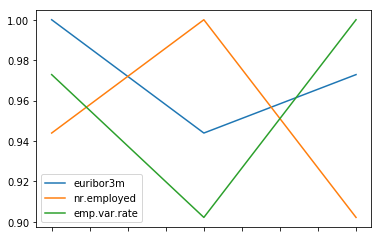

In [64]:
features_corr_maior.corr().plot()

### Método Spearman

In [65]:
features_corr_maior.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1) 

,euribor3m,nr.employed,emp.var.rate
euribor3m,1.0,0.93,0.94
nr.employed,0.93,1.0,0.94
emp.var.rate,0.94,0.94,1.0


### Método Kendall

In [66]:
features_corr_maior.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1) 

,euribor3m,nr.employed,emp.var.rate
euribor3m,1.0,0.79,0.82
nr.employed,0.79,1.0,0.84
emp.var.rate,0.82,0.84,1.0


## Excluindo variaveis correlacionadas

In [67]:
features_final = features_corr.drop('emp.var.rate', axis = 1) 

## PCA - Redução da Dimensionalidade

In [68]:
pca_tst = PCA(n_components=54)
pca = pca_tst.fit(features_final)

pca_samples = pca.transform(features_final)
pca_acumulado = 0

for i, ev in enumerate(pca.explained_variance_ratio_):
    pca_acumulado += ev
    print (i+1, " - Explained Variance: %.4f"%(ev), 'Acumulado: ', pca_acumulado)


1  - Explained Variance: 0.1179 Acumulado:  0.1178612448966248
2  - Explained Variance: 0.0865 Acumulado:  0.20437712750202874
3  - Explained Variance: 0.0752 Acumulado:  0.2795804679942488
4  - Explained Variance: 0.0683 Acumulado:  0.347903026582486
5  - Explained Variance: 0.0569 Acumulado:  0.4047644335809784
6  - Explained Variance: 0.0470 Acumulado:  0.45174340735363233
7  - Explained Variance: 0.0463 Acumulado:  0.49805944255066703
8  - Explained Variance: 0.0428 Acumulado:  0.5408114082246739
9  - Explained Variance: 0.0374 Acumulado:  0.5781936730326044
10  - Explained Variance: 0.0369 Acumulado:  0.6150652191948869
11  - Explained Variance: 0.0350 Acumulado:  0.6500736872248972
12  - Explained Variance: 0.0346 Acumulado:  0.6847169849587394
13  - Explained Variance: 0.0334 Acumulado:  0.7181272653035432
14  - Explained Variance: 0.0284 Acumulado:  0.7465401807982895
15  - Explained Variance: 0.0263 Acumulado:  0.7728111424088845
16  - Explained Variance: 0.0255 Acumulado:  0.

## Diminuindo a dimensionalidade de 54 para 45, pois, possui um valor acumulado proximo de 1.0

In [69]:
pca_final = PCA(n_components=45)
pca = pca_final.fit(features_final)

reduced_data = pca.transform(features_final)
features_final = pd.DataFrame(reduced_data)

pca_acumulado = 0
for i, ev in enumerate(pca.explained_variance_ratio_):
    pca_acumulado += ev
    print (i+1, " - Explained Variance: %.4f"%(ev), 'Acumulado: ', pca_acumulado)



1  - Explained Variance: 0.1179 Acumulado:  0.1178612448966248
2  - Explained Variance: 0.0865 Acumulado:  0.20437712750202874
3  - Explained Variance: 0.0752 Acumulado:  0.2795804679942488
4  - Explained Variance: 0.0683 Acumulado:  0.347903026582486
5  - Explained Variance: 0.0569 Acumulado:  0.4047644335809784
6  - Explained Variance: 0.0470 Acumulado:  0.45174340735363233
7  - Explained Variance: 0.0463 Acumulado:  0.49805944255066703
8  - Explained Variance: 0.0428 Acumulado:  0.5408114082246739
9  - Explained Variance: 0.0374 Acumulado:  0.5781936730326044
10  - Explained Variance: 0.0369 Acumulado:  0.6150652191948869
11  - Explained Variance: 0.0350 Acumulado:  0.6500736872248972
12  - Explained Variance: 0.0346 Acumulado:  0.6847169849587394
13  - Explained Variance: 0.0334 Acumulado:  0.7181272653035432
14  - Explained Variance: 0.0284 Acumulado:  0.7465401807982895
15  - Explained Variance: 0.0263 Acumulado:  0.7728111424088845
16  - Explained Variance: 0.0255 Acumulado:  0.

# Treinando o Modelo

## Função para executar os Modelos

In [70]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
#    '''
#    inputs:
#       - learner: algoritmo para ser treinado e testado
#       - sample_size: tamanho do dataset
#       - X_train: features de treino
#       - y_train: target (alvo) de treino
#       - X_test: features de teste
#       - y_test: target (alvo) de teste
#    '''
 
    results = {}

    learner.fit(X_train [:sample_size], y_train[:sample_size])
 
    predictions_test = learner.predict(X_test[:sample_size])
    predictions_train = learner.predict(X_train[:sample_size])
    
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train[:sample_size])          
    results['acc_test'] = accuracy_score(y_test[:sample_size], predictions_test[:sample_size])    
    results['f_train'] = f1_score(y_train[:sample_size], predictions_train[:sample_size])        
    results['f_test'] = f1_score(y_test[:sample_size], predictions_test[:sample_size])
    
    print("***** Treino *****")
    print("Acuracia.: ", results['acc_train'])
    print("Score....: ", results['f_train'])
    print("***** Teste *****")
    print("Acuracia.: ", results['acc_test'])
    print("Score....: ", results['f_test'])
  


## Dividindo o Dataset em treino e teste

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split

print("Treino tem {} exemplos.".format(X_train.shape[0]))
print("Teste  tem {} exemplos.".format(X_test.shape[0]))

Treino tem 32584 exemplos.
Teste  tem 8146 exemplos.


In [72]:
learner = DecisionTreeClassifier()

sample_size = X_train.shape[0]
resultado = train_predict(learner, sample_size, X_train, y_train, X_test, y_test)

***** Treino *****
Acuracia.:  0.9945371961698993
Score....:  0.9744473155325869
***** Teste *****
Acuracia.:  0.8465504542106556
Score....:  0.3315508021390374


In [73]:
learner = linear_model.SGDClassifier()

sample_size = X_train.shape[0]
resultado = train_predict(learner, sample_size, X_train, y_train, X_test, y_test)

***** Treino *****
Acuracia.:  0.9014240117849251
Score....:  0.3062634989200864
***** Teste *****
Acuracia.:  0.8984777805057697
Score....:  0.28890799656061905


In [74]:
learner = LogisticRegression()

sample_size = X_train.shape[0]
resultado = train_predict(learner, sample_size, X_train, y_train, X_test, y_test)

***** Treino *****
Acuracia.:  0.9034802356985023
Score....:  0.3457457873933847
***** Teste *****
Acuracia.:  0.9008102136017677
Score....:  0.3232830820770519


In [75]:
learner = SVC()

sample_size = X_train.shape[0]
resultado = train_predict(learner, sample_size, X_train, y_train, X_test, y_test)

***** Treino *****
Acuracia.:  0.900288485146084
Score....:  0.29568610448731847
***** Teste *****
Acuracia.:  0.8997053768720844
Score....:  0.2926406926406927


In [76]:
learner = RandomForestClassifier()

sample_size = X_train.shape[0]
resultado = train_predict(learner, sample_size, X_train, y_train, X_test, y_test)

***** Treino *****
Acuracia.:  0.9810950159587528
Score....:  0.907673860911271
***** Teste *****
Acuracia.:  0.8911122023078811
Score....:  0.3405204460966542


# Ajustando parametros dos modelo

In [77]:
def train_predict_tuning(learner, parameters, scorer, X_train, y_train, X_test, y_test): 
#    inputs:
#       - learner: algoritmo para ser treinado e testado
#       - parameters: parametros para serem testados no algoritmo
#       - scorer: score utilizado
#       - X_train: features de treino
#       - y_train: target (alvo) de treino
#       - X_test: features de teste
#       - y_test: target (alvo) de teste

    grid_obj = GridSearchCV(learner, parameters, cv=5, scoring=scorer)

    start = time.strftime('%H:%M:%S')
    
    grid_fit = grid_obj.fit(X_train, y_train)
    
    end = time.strftime('%H:%M:%S')
    
    print('inicio: ', start, ' - fim: ', end)

    best_learner = grid_fit.best_estimator_

    predictions = (learner.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_learner.predict(X_test)

    print("\nModelo não Otimizado\n------")
    print("Acuracia nos testes.......: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score nos testes........: {:.4f}".format(f1_score(y_test, predictions)))
    print("Precision-Score dos testes: {:.4f}".format(precision_score(y_test, predictions)))  
    print("Recall-Score dos testes...: {:.4f}".format(recall_score(y_test, predictions)))  
    print("Parametros................: ", learner.get_params())
    print("\nModelo Otimizado\n------")
    print("Acuracia nos testes.......: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("F-score nos testes........: {:.4f}".format(f1_score(y_test, best_predictions)))
    print("Precision-Score dos testes: {:.4f}".format(precision_score(y_test, best_predictions)))  
    print("Recall-Score dos testes...: {:.4f}".format(recall_score(y_test, best_predictions)))  
    print("Parametros................: ", grid_fit.best_estimator_)
    print("")
    
    matriz_de_confusao = confusion_matrix(y_test, best_predictions)
    
    plotar_matriz_de_confusao(matriz_de_confusao)
    

In [78]:
def plotar_matriz_de_confusao(cm):
#    inputs:
#       - cm: Matriz de confusão a ser gerado o grafico
    
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, fmt = '', cmap='YlGnBu', ax = ax)
    ax.xaxis.set_ticklabels(['Não', 'Sim'])
    ax.yaxis.set_ticklabels(['Não', 'Sim'])
    ax.set_xlabel('Previsto pelo Modelo')
    ax.set_ylabel('Verdadeiro')
    ax.set_title('Matriz de Confusão - Conjunto de Teste')


inicio:  21:11:52  - fim:  21:13:21

Modelo não Otimizado
------
Acuracia nos testes.......: 0.8980
F-score nos testes........: 0.3493
Precision-Score dos testes: 0.5807
Recall-Score dos testes...: 0.2497
Parametros................:  {'alpha': 0.0001, 'average': False, 'class_weight': None, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': None, 'n_iter': None, 'n_jobs': 1, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': None, 'verbose': 0, 'warm_start': False}

Modelo Otimizado
------
Acuracia nos testes.......: 0.9009
F-score nos testes........: 0.2902
Precision-Score dos testes: 0.6762
Recall-Score dos testes...: 0.1848
Parametros................:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elastic

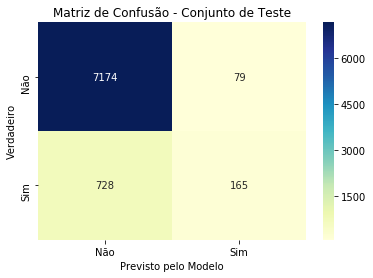

In [79]:
learner = linear_model.SGDClassifier()

random_state = list(range(15, 20))
loss = ['hinge','log','modified_huber','squared_hinge','perceptron','squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['none','l2', 'l1','elasticnet']

parameters = {'loss':loss,'penalty':penalty, 'random_state': random_state}

scorer = 'accuracy'

train_predict_tuning(learner, parameters, scorer, X_train, y_train, X_test, y_test)

inicio:  21:13:21  - fim:  21:14:00

Modelo não Otimizado
------
Acuracia nos testes.......: 0.9008
F-score nos testes........: 0.3233
Precision-Score dos testes: 0.6412
Recall-Score dos testes...: 0.2161
Parametros................:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Modelo Otimizado
------
Acuracia nos testes.......: 0.9009
F-score nos testes........: 0.3247
Precision-Score dos testes: 0.6424
Recall-Score dos testes...: 0.2172
Parametros................:  LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



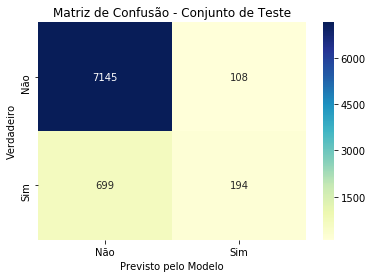

In [80]:
learner = LogisticRegression()

random_state = list(range(1, 5))
penalty = ['l1']
c = list(range(1, 10))

parameters = {'penalty':penalty,'C':c, 'random_state': random_state}

scorer = 'accuracy'

train_predict_tuning(learner, parameters, scorer, X_train, y_train, X_test, y_test)

inicio:  21:14:01  - fim:  21:28:36

Modelo não Otimizado
------
Acuracia nos testes.......: 0.9008
F-score nos testes........: 0.3233
Precision-Score dos testes: 0.6412
Recall-Score dos testes...: 0.2161
Parametros................:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Modelo Otimizado
------
Acuracia nos testes.......: 0.9009
F-score nos testes........: 0.3247
Precision-Score dos testes: 0.6424
Recall-Score dos testes...: 0.2172
Parametros................:  LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



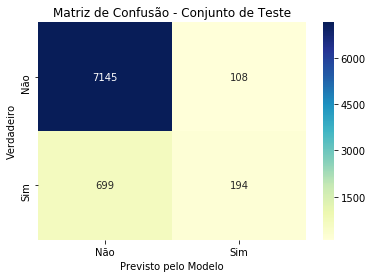

In [81]:
learner = LogisticRegression()

random_state = list(range(1, 5))
penalty = ['l2']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
c = list(range(1, 10))

parameters = {'penalty':penalty,'solver':solver,'C':c, 'random_state': random_state}

scorer = 'accuracy'


train_predict_tuning(learner, parameters, scorer, X_train, y_train, X_test, y_test)